### Data Analysis - Fast Food Nutrition Values 

#### 1. Importing libraries and preliminar analysis

Importing libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')

Importing dataset

In [2]:
df=pd.read_csv('/kaggle/input/fast-food-joint-nutrition-values-dataset/Nutrition_Value_Dataset.csv',sep=',',encoding='UTF-8')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_') 
df.columns=df.columns.str.rstrip()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            530 non-null    object 
 1   category           530 non-null    object 
 2   product            530 non-null    object 
 3   per_serve_size     530 non-null    object 
 4   energy_(kcal)      530 non-null    float64
 5   carbohydrates_(g)  530 non-null    float64
 6   protein_(g)        530 non-null    float64
 7   fiber_(g)          530 non-null    float64
 8   sugar_(g)          530 non-null    float64
 9   total_fat_(g)      530 non-null    float64
 10  saturated_fat_(g)  530 non-null    float64
 11  trans_fat_(g)      530 non-null    float64
 12  cholesterol_(mg)   530 non-null    float64
 13  sodium_(mg)        443 non-null    float64
dtypes: float64(10), object(4)
memory usage: 58.1+ KB


In [4]:
df.head(10) 

,company,category,product,per_serve_size,energy_(kcal),carbohydrates_(g),protein_(g),fiber_(g),sugar_(g),total_fat_(g),saturated_fat_(g),trans_fat_(g),cholesterol_(mg),sodium_(mg)
0,Pizza Hut,All Meals,Corn n Cheese (Personal),143.5 g,432.60,65.64,17.91,3.85,0.0,10.93,5.14,0.16,16.19,499.72
1,Pizza Hut,All Meals,Country Feast (Personal),178 g,407.60,67.11,16.73,7.19,0.0,8.03,3.24,0.11,66.80,818.00
2,Pizza Hut,All Meals,Double Cheese (Personal),143 g,423.33,59.97,18.26,3.49,0.0,12.27,5.23,0.18,19.75,638.22
3,Pizza Hut,All Meals,Double Paneer Supreme (Personal),174.5 g,474.03,52.86,20.07,3.79,0.0,20.26,9.25,0.33,71.72,1128.11
4,Pizza Hut,All Meals,Farmer`s Pick (Personal),177 g,408.16,53.93,19.91,2.46,0.0,12.53,4.90,0.14,48.09,942.67
5,Pizza Hut,All Meals,Margherita (Personal),130.5 g,361.73,50.69,15.93,4.08,0.0,10.58,3.86,0.12,26.47,713.82
6,Pizza Hut,All Meals,Spiced Paneer (Personal),157 g,408.01,47.54,21.68,6.92,0.0,14.57,8.02,0.35,37.37,622.38
7,Pizza Hut,All Meals,Tandoori Onion (Personal),139.5 g,410.16,57.14,15.08,1.33,0.0,13.48,4.52,0.13,23.87,826.22
8,Pizza Hut,All Meals,Tandoori Paneer (Personal),167.5 g,532.08,76.38,17.82,7.07,0.0,17.25,6.67,0.22,21.67,960.93
9,Pizza Hut,All Meals,Veg Exotica (Personal),170.5 g,363.05,55.12,13.66,4.28,0.0,9.77,3.92,0.12,23.96,640.46


In [5]:
df.describe() 

,energy_(kcal),carbohydrates_(g),protein_(g),fiber_(g),sugar_(g),total_fat_(g),saturated_fat_(g),trans_fat_(g),cholesterol_(mg),sodium_(mg)
count,530.000000,530.000000,530.000000,530.0000,530.000000,530.000000,530.000000,530.000000,530.000000,443.000000
mean,377.304470,39.442302,16.710340,inf,8.276226,13.228528,5.946302,0.279443,118.620434,422.431578
std,338.315722,21.196943,24.425784,NaN,12.186627,10.740934,4.844024,3.265604,502.865434,471.300077
min,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180.750000,24.227500,5.000000,1.6900,0.000000,5.000000,2.500000,0.030000,9.462500,1.450000
50%,329.645000,38.570000,11.445000,3.0000,3.200000,12.600000,5.240000,0.110000,30.085000,220.000000
75%,451.812500,54.120000,20.005000,5.9975,9.850000,18.360000,8.095000,0.207500,77.535000,754.975000
max,2880.000000,137.800000,203.000000,inf,64.220000,82.600000,33.000000,75.260000,9769.700000,2399.490000


In [6]:
print('\033[1m'+'*Unique values per column*: ','\n'+'\033[0m')
for column in df.columns:
    print(column,df[column].nunique())

*Unique values per column*:  

company 6
category 13
product 464
per_serve_size 338
energy_(kcal) 496
carbohydrates_(g) 445
protein_(g) 383
fiber_(g) 192
sugar_(g) 258
total_fat_(g) 379
saturated_fat_(g) 318
trans_fat_(g) 52
cholesterol_(mg) 418
sodium_(mg) 334


In [7]:
# Apresentar quantidade de valores nulos por coluna
print('\033[1m' +'*Null values per column*: ','\n'+'\033[0m')
for column in df.columns: 
    print(column,df[column].isna().sum())

*Null values per column*:  

company 0
category 0
product 0
per_serve_size 0
energy_(kcal) 0
carbohydrates_(g) 0
protein_(g) 0
fiber_(g) 0
sugar_(g) 0
total_fat_(g) 0
saturated_fat_(g) 0
trans_fat_(g) 0
cholesterol_(mg) 0
sodium_(mg) 87


In [8]:
def fill_nulls(df):
    for column in df.columns:
        column,df[column].fillna(0,inplace=True)
    return print(df.isnull().sum())
fill_nulls(df)

company              0
category             0
product              0
per_serve_size       0
energy_(kcal)        0
carbohydrates_(g)    0
protein_(g)          0
fiber_(g)            0
sugar_(g)            0
total_fat_(g)        0
saturated_fat_(g)    0
trans_fat_(g)        0
cholesterol_(mg)     0
sodium_(mg)          0
dtype: int64


In [9]:
df.groupby('company')[['product']].agg(['count'])

,product
,count
company,
Burger King,41
Dominos,87
KFC,72
McDonalds,140
Pizza Hut,144
Starbucks,46


In [10]:
df['category']=df['category'].str.title()
df['product']=df['product'].str.title()
df.groupby('category')[['product']].agg(['count'])

,product
,count
category,
All Meals,344
Breakfast Menu,8
Condiments Menu,9
"Cookies, Brownies & Bars",9
"Croissants, Danishes & Bagels",9
Desserts Menu,10
Fruit & Yogurt,3
Gourmet Menu,17


In [11]:
df.sort_values(by='energy_(kcal)',ascending=False).head(10)

,company,category,product,per_serve_size,energy_(kcal),carbohydrates_(g),protein_(g),fiber_(g),sugar_(g),total_fat_(g),saturated_fat_(g),trans_fat_(g),cholesterol_(mg),sodium_(mg)
401,KFC,All Meals,10 Pc Fried Leg,1000.0,2880.0,85.1,178.6,45.0,0.00,82.6,33.0,0.20,112.0,1.1
419,KFC,All Meals,"Super Sixes (4 Hc, 6 Hw,\n8 Strips)",962.0,2816.5,39.5,172.1,23.0,0.00,41.5,17.0,0.08,57.0,0.8
418,KFC,All Meals,Triple Treat (4 Hc + 4\nSmoky + 6 Boneless\nSt...,1008.0,2475.4,41.7,203.0,24.0,0.00,43.1,16.6,0.07,59.0,0.9
417,KFC,All Meals,10 For 550\n(10 Pc Hc)\nOn Wednesdays,910.0,2382.2,38.8,143.3,28.0,0.00,49.8,19.7,0.11,70.0,0.7
415,KFC,All Meals,Friendship Bucket Dl(3Pc Hc+3Pc Hw+3Pc Strips ...,693.5,2131.4,41.1,124.8,23.0,0.00,42.2,17.5,0.07,58.0,0.9
399,KFC,All Meals,8 Pc Bucket,728.0,2117.5,34.5,127.4,25.0,0.00,44.2,17.5,0.10,62.0,0.6
414,KFC,All Meals,Big Eight ( 4Pc Smoky+ 4Pc Hc),732.0,1758.2,27.9,149.0,17.0,0.00,30.6,11.2,0.07,43.0,0.6
398,KFC,All Meals,6 Pc,546.0,1588.2,38.8,95.6,28.0,0.00,49.8,19.7,0.11,70.0,0.7
391,KFC,All Meals,Mixed Zinger Doubles( 1 Ch Zinger+1 Tandoori\n...,462.0,1562.9,62.8,54.0,12.0,5.75,29.5,8.7,0.03,31.0,0.4
400,KFC,All Meals,5 Pc Fried Leg,500.0,1440.0,42.6,89.3,22.0,0.00,41.3,16.5,0.08,56.0,0.5


In [12]:
df.sort_values(by='total_fat_(g)',ascending=False).head(10)

,company,category,product,per_serve_size,energy_(kcal),carbohydrates_(g),protein_(g),fiber_(g),sugar_(g),total_fat_(g),saturated_fat_(g),trans_fat_(g),cholesterol_(mg),sodium_(mg)
401,KFC,All Meals,10 Pc Fried Leg,1000.0,2880.00,85.10,178.60,45.0,0.00,82.60,33.0,0.20,112.00,1.10
169,Burger King,All Meals,Chicken Wings Fried ( 15Pcs),570*,1224.00,6.60,129.40,inf,0.00,75.50,29.3,0.00,9769.70,3.30
417,KFC,All Meals,10 For 550\n(10 Pc Hc)\nOn Wednesdays,910.0,2382.20,38.80,143.30,28.0,0.00,49.80,19.7,0.11,70.00,0.70
398,KFC,All Meals,6 Pc,546.0,1588.20,38.80,95.60,28.0,0.00,49.80,19.7,0.11,70.00,0.70
338,McDonalds,Desserts Menu,Chicken Cheese Lava Burger,307.0,834.36,76.03,27.37,3.0,16.75,45.18,17.0,0.27,73.11,1745.04
399,KFC,All Meals,8 Pc Bucket,728.0,2117.50,34.50,127.40,25.0,0.00,44.20,17.5,0.10,62.00,0.60
418,KFC,All Meals,Triple Treat (4 Hc + 4\nSmoky + 6 Boneless\nSt...,1008.0,2475.40,41.70,203.00,24.0,0.00,43.10,16.6,0.07,59.00,0.90
415,KFC,All Meals,Friendship Bucket Dl(3Pc Hc+3Pc Hw+3Pc Strips ...,693.5,2131.40,41.10,124.80,23.0,0.00,42.20,17.5,0.07,58.00,0.90
419,KFC,All Meals,"Super Sixes (4 Hc, 6 Hw,\n8 Strips)",962.0,2816.50,39.50,172.10,23.0,0.00,41.50,17.0,0.08,57.00,0.80
409,KFC,All Meals,Chick & Share Bucket: 5 Pc\nHot & Crispy,455.0,1323.50,32.30,79.60,23.0,0.00,41.50,16.4,0.09,58.00,0.50


#### 2. Univariate Analysis

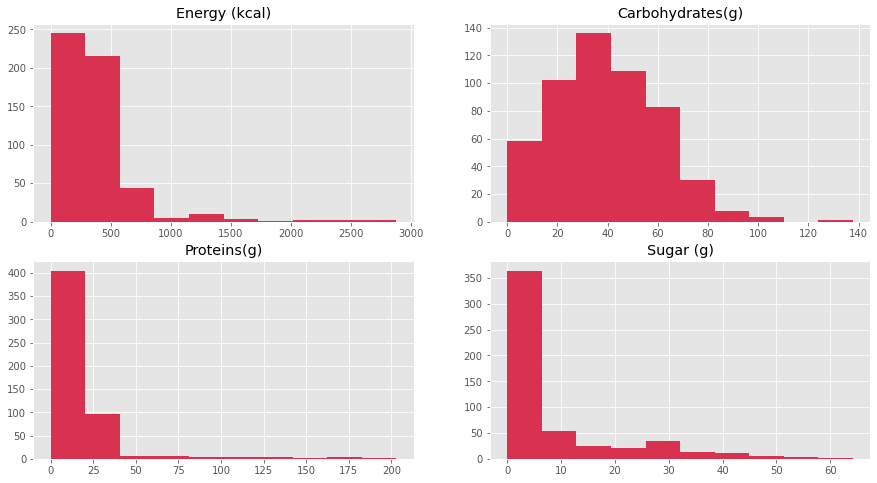

In [13]:
fig = plt.figure(figsize=(15,8))
plt.subplot(221)
_=plt.hist(df['energy_(kcal)'],color='#D93250')
_=plt.title("Energy (kcal)")
plt.subplot(222)
_=plt.hist(df['carbohydrates_(g)'],color='#D93250')
_=plt.title("Carbohydrates(g)")
plt.subplot(223)
_=plt.hist(df['protein_(g)'],color='#D93250')
_=plt.title('Proteins(g)')
plt.subplot(224)
_=plt.hist(df['sugar_(g)'],color='#D93250')
_=plt.title('Sugar (g)')

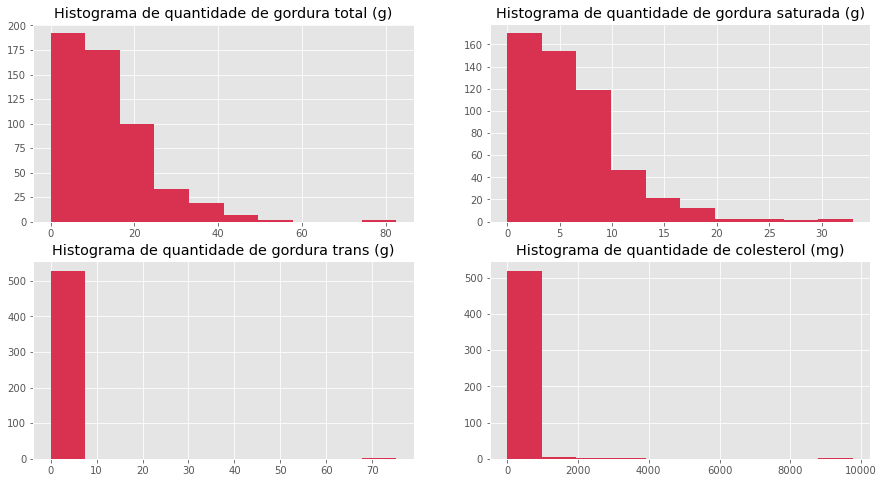

In [14]:
fig = plt.figure(figsize=(15,8))
plt.subplot(221)
_=plt.hist(df['total_fat_(g)'],color='#D93250')
_=plt.title('Histograma de quantidade de gordura total (g)')
plt.subplot(222)
_=plt.hist(df['saturated_fat_(g)'],color='#D93250')
_=plt.title('Histograma de quantidade de gordura saturada (g)')
plt.subplot(223)
_=plt.hist(df['trans_fat_(g)'],color='#D93250')
_=plt.title('Histograma de quantidade de gordura trans (g)')
plt.subplot(224)
_=plt.hist(df['cholesterol_(mg)'],color='#D93250')
_=plt.title('Histograma de quantidade de colesterol (mg)')

#### 4. Bivariate Analysis

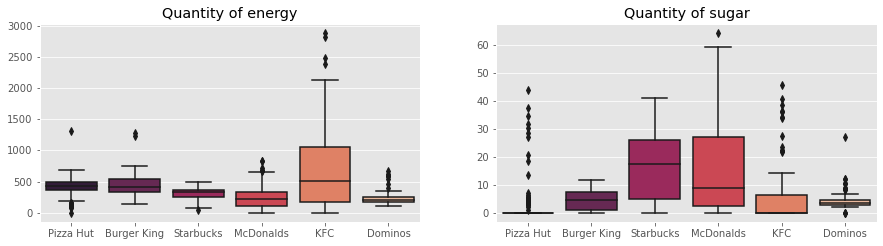

In [15]:
_ = plt.figure(figsize=(15,8))
_=plt.subplot(221)
_=sns.boxplot(y='energy_(kcal)',x='company',data=df,palette='rocket',orient='v').set(xlabel=None,ylabel=None)
_=plt.title('Quantity of energy')
plt.subplot(222)
_=sns.boxplot(y='sugar_(g)',x='company',data=df,palette='rocket',orient='v').set(xlabel=None,ylabel=None)
_=plt.title('Quantity of sugar')


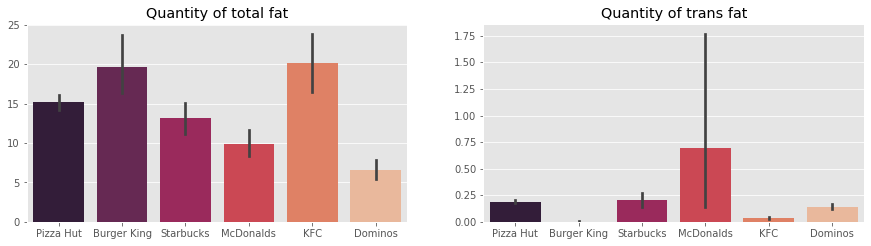

In [16]:
fig = plt.figure(figsize=(15,8))
plt.subplot(221)
_=sns.barplot(y='total_fat_(g)',x='company',data=df,palette='rocket',orient='v').set(xlabel=None,ylabel=None)
_=plt.title('Quantity of total fat')
plt.subplot(222)
_=sns.barplot(y='trans_fat_(g)',x='company',data=df,palette='rocket',orient='v').set(xlabel=None,ylabel=None)
_=plt.title('Quantity of trans fat')

#### 5. Multivariate Analysis

#### 6. Predictive Modeling: Estimating Calorie Content
Now we will build a machine learning model to predict the calorie content (`energy_(kcal)`) based on other nutritional features like fat, sugar, and protein.

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define features and target
features = ['total_fat_(g)', 'saturated_fat_(g)', 'trans_fat_(g)', 'cholesterol_(mg)',
            'sodium_(mg)', 'carbohydrates_(g)', 'fiber_(g)', 'sugar_(g)', 'protein_(g)']
X = df[features]
y = df['energy_(kcal)']

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict on test data
y_pred = model.predict(X_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R²):", r2)


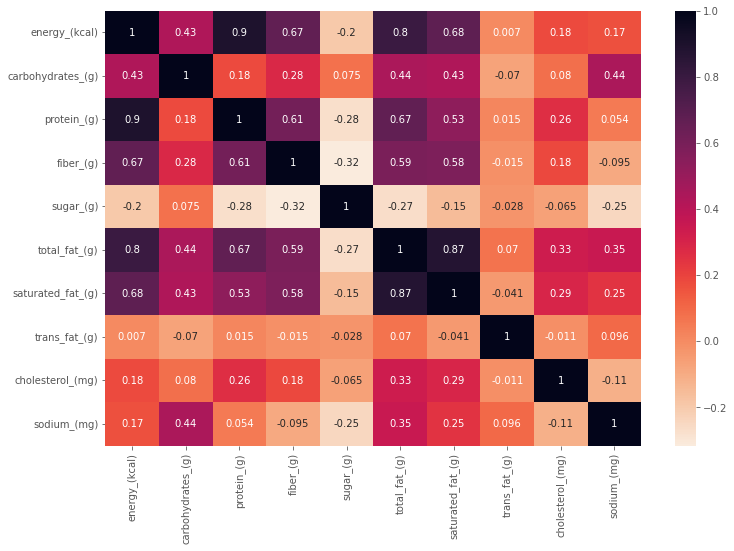

In [17]:
fig,ax=plt.subplots(figsize=(12,8))
_=sns.heatmap(df.corr(),cmap='rocket_r',annot=True)

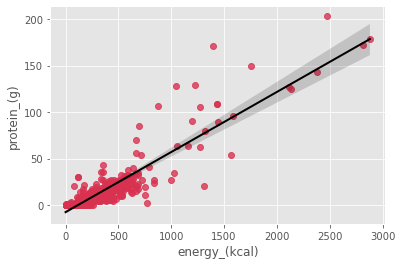

In [18]:
_=sns.regplot(data=df,y='protein_(g)',x='energy_(kcal)',color='#D93250', line_kws={'lw': 2, 'color': '#000000'})

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define features and target
features = ['total_fat_(g)', 'saturated_fat_(g)', 'trans_fat_(g)', 'cholesterol_(mg)',
            'sodium_(mg)', 'carbohydrates_(g)', 'fiber_(g)', 'sugar_(g)', 'protein_(g)']
X = df[features]
y = df['energy_(kcal)']

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict on test data
y_pred = model.predict(X_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R²):", r2)
